In [1]:
######Data Visualization Dashboard
#
#libraries
#pandas is for manipulation and analysis of data
import pandas as pd
#dash is for writing web
import dash
from dash import dcc
from dash import html
#variables and functions start with lower letter but classes start with upper-case
from dash.dependencies import Input, Output
#high level data visualizing library
import plotly.express as px
#Seaborn is data visualizing library that is built on top of matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Placing the data we have on file into a variable
df = pd.read_csv('your_dataset.csv')


In [3]:
#create dash app. The first dash is a module creating a Dash application. __name__ is the name of the current module
#If the script is run directly the name is changed to main. The name helpe find the python determine the root path of applications
#app defines the layout, call back and behaviour of web applications
#Dash components (like HTML elements, graphs, dropdowns, etc.)
#The Dash library is specifically designed for creating interactive web-based applications using Python, allowing you to
#build web interfaces, incorporate interactive components, and define callbacks for handling user interactions.
app = dash.Dash(__name__)
#dash.Dash for initializing the application, dash_core_components and 
#dash_html_components for constructing the layout, and other 
#dash.dependencies for managing the callback interactions.

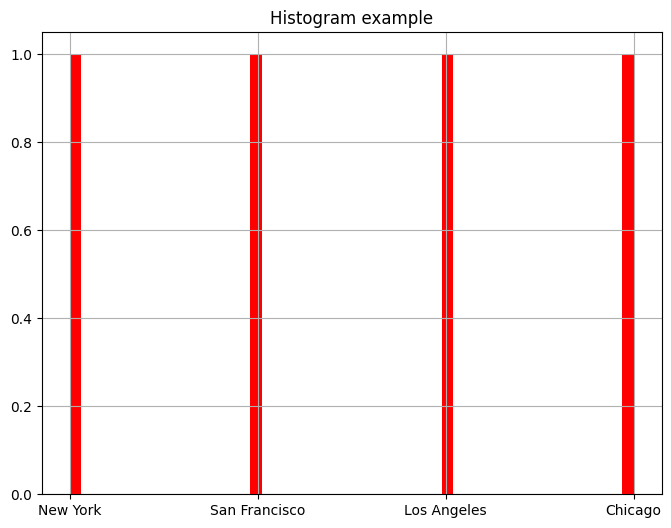

In [4]:
#Step 1 exploratory data analysis
plt.figure(figsize=(8,6))
plt.hist(df['City'], bins = 50, color = 'red')

plt.xlabel = ('x label')
plt.ylabel = ('y label')
plt.title('Histogram example')
plt.grid(True)
#plt.tight_layout()

In [5]:
#define the lay out of the dashboard using the dash html components
#When you write app.layout, you are assigning a layout to the Dash application by setting the layout attribute 
#of the Dash application object (app)
##Let me say it disway..... you design a layout for app
app.layout = html.Div([
    #title of the dashboard
    #html.Div in Dash serves as a container element used to group and organize other HTML elements or Dash components.
    html.H1('Data Visualization Dashboard'),#the <h1> element is used to define the most important heading or title within a section or a webpage. 
    #Drop down components for selecting features,columns
dcc.Dropdown(
    id='dropdown-feature', #unique identifier for this dropdown component
    #dropdown options based onData Frame columns
    options = [{'label':col, 'value':col}for col in df.columns], #When I eliminated this line, names of selection box got affected
    #default value to be displayed when the app starts
    value = df.columns[1], 
    #Adjust the width of dropdown
    style = {'width' :'50%'}
    ),
    # Graph component to display visualizations (initially empty)
    dcc.Graph(id='visualizations')  # Unique identifier for the graph component
    #ID inside the paranthesis refers to the attribute outside the paranthesis
])


In [6]:
# Define callback to update the graph based on dropdown selection
@app.callback(
    Output('visualizations','figure'),
    [Input('dropdown-feature','value')]
          )
def update_graph(selected_feature):
# Generate Plotly Express visualization based on the selected feature/column
    fig = px.histogram(df, x=selected_feature, title=f'{selected_feature} Distribution')

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8053)

In [7]:
#for component in app.layout:
 #   if isinstance(component, dcc.Dropdown) or isinstance(component, dcc.Graph):
  #      print(f"Component ID: {component.id}")


In [8]:
# Print the IDs used in the callback
print(f"Callback Output ID: {'visualizations'}")
print(f"Callback Input ID: {'dropdown-feature'}")

Callback Output ID: visualizations
Callback Input ID: dropdown-feature


In [9]:
import io
import base64

In [10]:
#what is slider
##slider is a graphical control element that allows users to select 
##a value from a continuous range by moving a visual slider control along a track. 

import dash
from dash import dcc, html

app = dash.Dash(__name__)

app.layout = html.Div([
    html.Label('Select a value:'),
    dcc.Slider(
        id='slider',  # Assigned an ID 'slider' to the Slider component
    ##the id attribute is used to uniquely identify an HTML element or a Dash component 
    ##within the layout. Each element or component in a web page or a Dash application can have its own unique ID, 
       ##allowing it to be referenced, targeted, or manipulated via CSS, JavaScript, or Python code.
        min=0,
        max=10,
        step=1,
        value=5,
        marks={i: str(i) for i in range(11)}
    ),
    html.Div(id='slider-output')
])

@app.callback(
    dash.dependencies.Output('slider-output', 'children'),
    [dash.dependencies.Input('slider', 'value')]
)
def update_output(children): #Children is a predefined property of a component that you utilize to control 
    # what content or components are displayed inside that particular component you can also use 'value' istead of children here
    return f'You selected: {children}'

if __name__ == '__main__':
   app.run_server(debug=True, port=8052)